<a href="https://colab.research.google.com/github/ZachPetroff/Babybot/blob/master/examples/Expectation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This code can be used to add a folder in the repository to the Python import
# path, irrespective of whether the notebook is being run in colab or Jupyter.
# (C) 2020 Abe Leite, Indiana University Bloomington
# This code block is released under MIT license. Feel free to make use of
# this code in any projects so long as you reproduce this text.

import os
import sys
import subprocess

repo_URL = 'https://github.com/ZachPetroff/Babybot'
repo_name = repo_URL.split('/')[-1]
code_folder = ''

try:
  repo_path = subprocess.check_output('git rev-parse --show-toplevel', shell=True).decode().strip()
except subprocess.CalledProcessError:
  os.system(f'git clone {repo_URL} --depth 1')
  repo_path = os.path.abspath(repo_name)

code_path = os.path.join(repo_path, code_folder)
sys.path.append(code_path)
print(f'Loading code from {code_path}')

Loading code from /content/Babybot/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import main
import graph
import simulation

In [3]:
reward = .07 #@param
cost = .02 #@param
exp_growth = 2e-4 #@param
exp_decay = 5e-4 #@param

separations, connection_changes, mins, ram_mean, lam_mean, rlm_mean, llm_mean, reward, rae_mean, lae_mean, rle_mean, lle_mean, norm_rates, moving_rates, cms, mms, timestep = simulation.simulate(rates=[20, 20, 20, 20], aquisition_time=20, extinction_time=15, reward=reward, cost=cost, expectation_growth=exp_growth, expectation_decay=exp_decay)

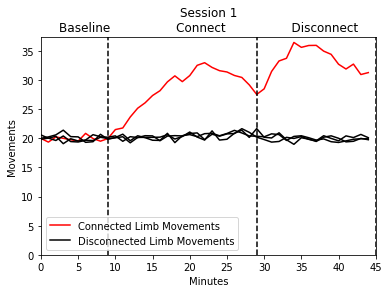

In [4]:
graph.plot_movements(separations, connection_changes, mins, ram_mean, lam_mean, rlm_mean, llm_mean)

# Movements Over Time
The figure above displays the moves of the connected limb over time.
As the babybot moves their connected limb during the connected phase, 
and thus, move the mobile, they recieve a visual reward, encouraging 
the movement of the connected limb. However, as the reward is given, 
expectation for that reward is also given. Expectation begins to 
decrease limb movement, as seen after minute thirty. This can be 
thought of as fatigue or boredom. Though, when the contingent reward is
taken away, the same expectation value causes a rapid increase of movements.
This is known as an "extinction burst".

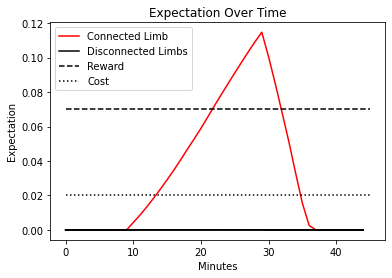

In [5]:
graph.plot_expectation(mins, reward, cost, rae_mean, lae_mean, rle_mean, lle_mean)

# Expectation Over Time
From the graph above, we can see that expectation begins to rise as soon as
the limb is connected. At about minute thirty, expectation surpasses the reward
value, causing a decrease in limb movements. However, once the reward is no 
longer attainable during the disconnect phase, expectation for a reward begins 
to increase limb movements as the infant tries to regain the lost reward.